In [1]:
# 逻辑回归，数据量多，特征少
# 岭回归，数据量少，特征多
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression #线性回归
import sklearn.datasets as datasets #自带数据

diabetes = datasets.load_diabetes() #糖尿病数据
diabetes

{'DESCR': 'Diabetes dataset\n================\n\nNotes\n-----\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\nData Set Characteristics:\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attributes:\n    :Age:\n    :Sex:\n    :Body mass index:\n    :Average blood pressure:\n    :S1:\n    :S2:\n    :S3:\n    :S4:\n    :S5:\n    :S6:\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttp://www4.stat.ncsu.edu/~boos/var.select/diabetes.html\n\nFor more information see:\nB

In [19]:
x = diabetes.data #糖尿病的描述数据
x.shape

(442, 10)

In [20]:
y = diabetes.target
y.shape

(442,)

In [21]:
# 拆分数据
x = x[:, np.newaxis, 2] #中括号左边表示取出所有的行，整个表示新建一个轴
x

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [23]:
x = x[:, 0].reshape((442, 1))
x

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [24]:
x.shape

(442, 1)

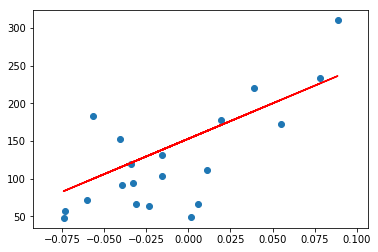

In [27]:
x_train = x[:-20]
x_test = x[-20:]
y_train = y[:-20]
y_test = y[-20:] #抽取训练数据以及预测数据
lrg = LinearRegression() #创建一个线性回归的模型
lrg.fit(x_train, y_train) #训练
y_new = lrg.predict(x_test) #预测结果
plt.scatter(x_test, y_test)
plt.plot(x_test, y_new, "r")

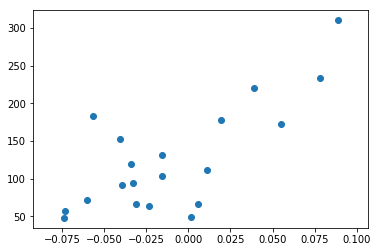

In [28]:
plt.scatter(x_test, y_test)

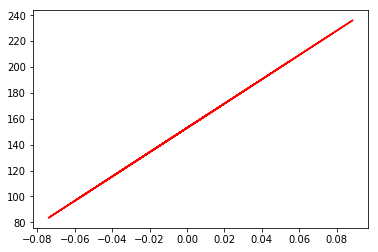

In [29]:
plt.plot(x_test, y_new, "r")

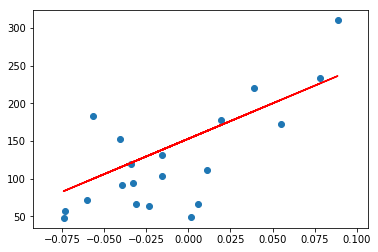

In [30]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_new, "r")

In [34]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression #线性回归
import sklearn.datasets as datasets #自带数据

x_train = np.array([[2,1],[1,-1]])
y_train = np.array([[3],[1]])
lrg = LinearRegression() #创建线性回归
lrg.fit(x_train, y_train) #训练
coef_ = lrg.coef_
np.dot(coef_, x_train) #仍然属于逻辑回归
coef_

array([[0.4, 0.8]])

In [36]:
x_train = np.array([[2,1,2,1], [2,3,2,3]]) #新的测试数据
y_train = np.array([1.3, 3])
lrg = LinearRegression() #创建线性回归
lrg.fit(x_train, y_train) #训练
lrg.predict([[3,4,4,3]]) #逻辑回归进行预测，样本数太少，预测不准

array([3.425])

In [37]:
lrg.coef_

array([0.   , 0.425, 0.   , 0.425])

In [40]:
# 岭回归，相对而言在这种样本少的情况表现的比逻辑回归好
from sklearn.linear_model import Ridge
x_train = np.array([[1,1], [3,3]])
y_train = np.array([1.2, 3])
ridge = Ridge(alpha = 1)
ridge.fit(x_train, y_train)
ridge.predict([[4, 3]])

array([3.18])

In [1]:
# 岭回归与逻辑回归的对比
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression #线性回归
import sklearn.datasets as datasets #自带数据
from sklearn.linear_model import Ridge

x = [[0,0,0],[1,1,1]]
y = [0,1]
lng = LinearRegression() #逻辑回归，考虑所有参数(特征)
lng.fit(x, y)
lng.predict(np.array([2,2,2])[np.newaxis,:])

array([2.])

In [6]:
ridge = Ridge(alpha = 3) #岭回归，alpha=0时和逻辑回归等价，alpha的值放弃特征的程度，当为负数时，表示强化某些特征
ridge.fit(x, y)
ridge.predict(np.array([2,2,2])[np.newaxis,:])

array([1.])

In [3]:
ridge.coef_ #表示斜率

array([0.2, 0.2, 0.2])

In [4]:
ridge.intercept_ #截距

0.2

In [2]:
# lasso回归
# 岭回归与逻辑回归的对比
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression #线性回归
import sklearn.datasets as datasets #自带数据
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso #拉格朗日回归

x = [[0,0,0], [1,1,1]]
y = [0,1]
#alpha=0时，等价于线性回归，用于忽略(或强化)一些特征(这些特征由岭回归自动挖掘即能够自动调节各特征的权重)
lasso = Lasso(alpha = 1)
lasso.fit(x, y)
lasso.predict([[2,2,2]])

array([0.5])

In [3]:
lasso.coef_ #斜率

array([0., 0., 0.])

In [4]:
lasso.intercept_ #截距

0.5